In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [14]:
# Load the dataset
df = pd.read_csv(r"C:\Users\chojk\Desktop\myproject\SleepHealtLifestyleDatasetPredictiveModelling\Sleep_health_and_lifestyle_dataset.csv")

def prepDataFeatures(df):
    print("Prepping features.")
    # Copy the DataFrame and drop the target variable
    X = df.copy()
    X = X.drop('Person ID', axis=1)
    
    # Devide 'Blood Pressure' column into HighBP and LowBP
    X[['HighBP', 'LowBP']] = X['Blood Pressure'].str.split('/', expand=True)
    X = X.drop(columns=['Blood Pressure'])
    
    # Convert "Normal Weight" to "Normal" in the 'BMI Category' column
    X['BMI Category'] = X['BMI Category'].replace('Normal Weight', 'Normal')
    
    # Convert both 'HighBP' and 'LowBP' to integers
    X['HighBP'] = pd.to_numeric(X['HighBP'], errors='coerce', downcast='integer')
    X['LowBP'] = pd.to_numeric(X['LowBP'], errors='coerce', downcast='integer')
    
    # Make dummy variables
    X = pd.get_dummies(X, columns=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype=int)
    y = df['Quality of Sleep']
    return X, y

X, y = prepDataFeatures(df)

Prepping features.


In [15]:
# =========================
# 1. Data Overview
# =========================
print("First 5 rows of the dataset:")
print(X.head())

print("\nDataset Info:")
print(X.info())

print("\nSummary Statistics:")
print(X.describe())

First 5 rows of the dataset:
   Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0   32             7.5                 8                       45   
1   32             7.5                 8                       45   
2   51             8.5                 9                       30   
3   51             8.5                 9                       30   
4   51             8.5                 9                       30   

   Stress Level  Heart Rate  Daily Steps  HighBP  LowBP  Gender_Female  ...  \
0             3          70         8000     120     80              0  ...   
1             3          70         8000     120     80              0  ...   
2             3          65         5000     125     80              1  ...   
3             3          65         5000     125     80              1  ...   
4             3          65         5000     125     80              1  ...   

   Occupation_Sales Representative  Occupation_Salesperson  \
0                  


Missing Values Count:
Age                                0
Sleep Duration                     0
Quality of Sleep                   0
Physical Activity Level            0
Stress Level                       0
Heart Rate                         0
Daily Steps                        0
HighBP                             0
LowBP                              0
Gender_Female                      0
Gender_Male                        0
Occupation_Accountant              0
Occupation_Doctor                  0
Occupation_Engineer                0
Occupation_Lawyer                  0
Occupation_Manager                 0
Occupation_Nurse                   0
Occupation_Sales Representative    0
Occupation_Salesperson             0
Occupation_Scientist               0
Occupation_Software Engineer       0
Occupation_Teacher                 0
BMI Category_Normal                0
BMI Category_Obese                 0
BMI Category_Overweight            0
Sleep Disorder_Insomnia            0
Sleep Disorder_

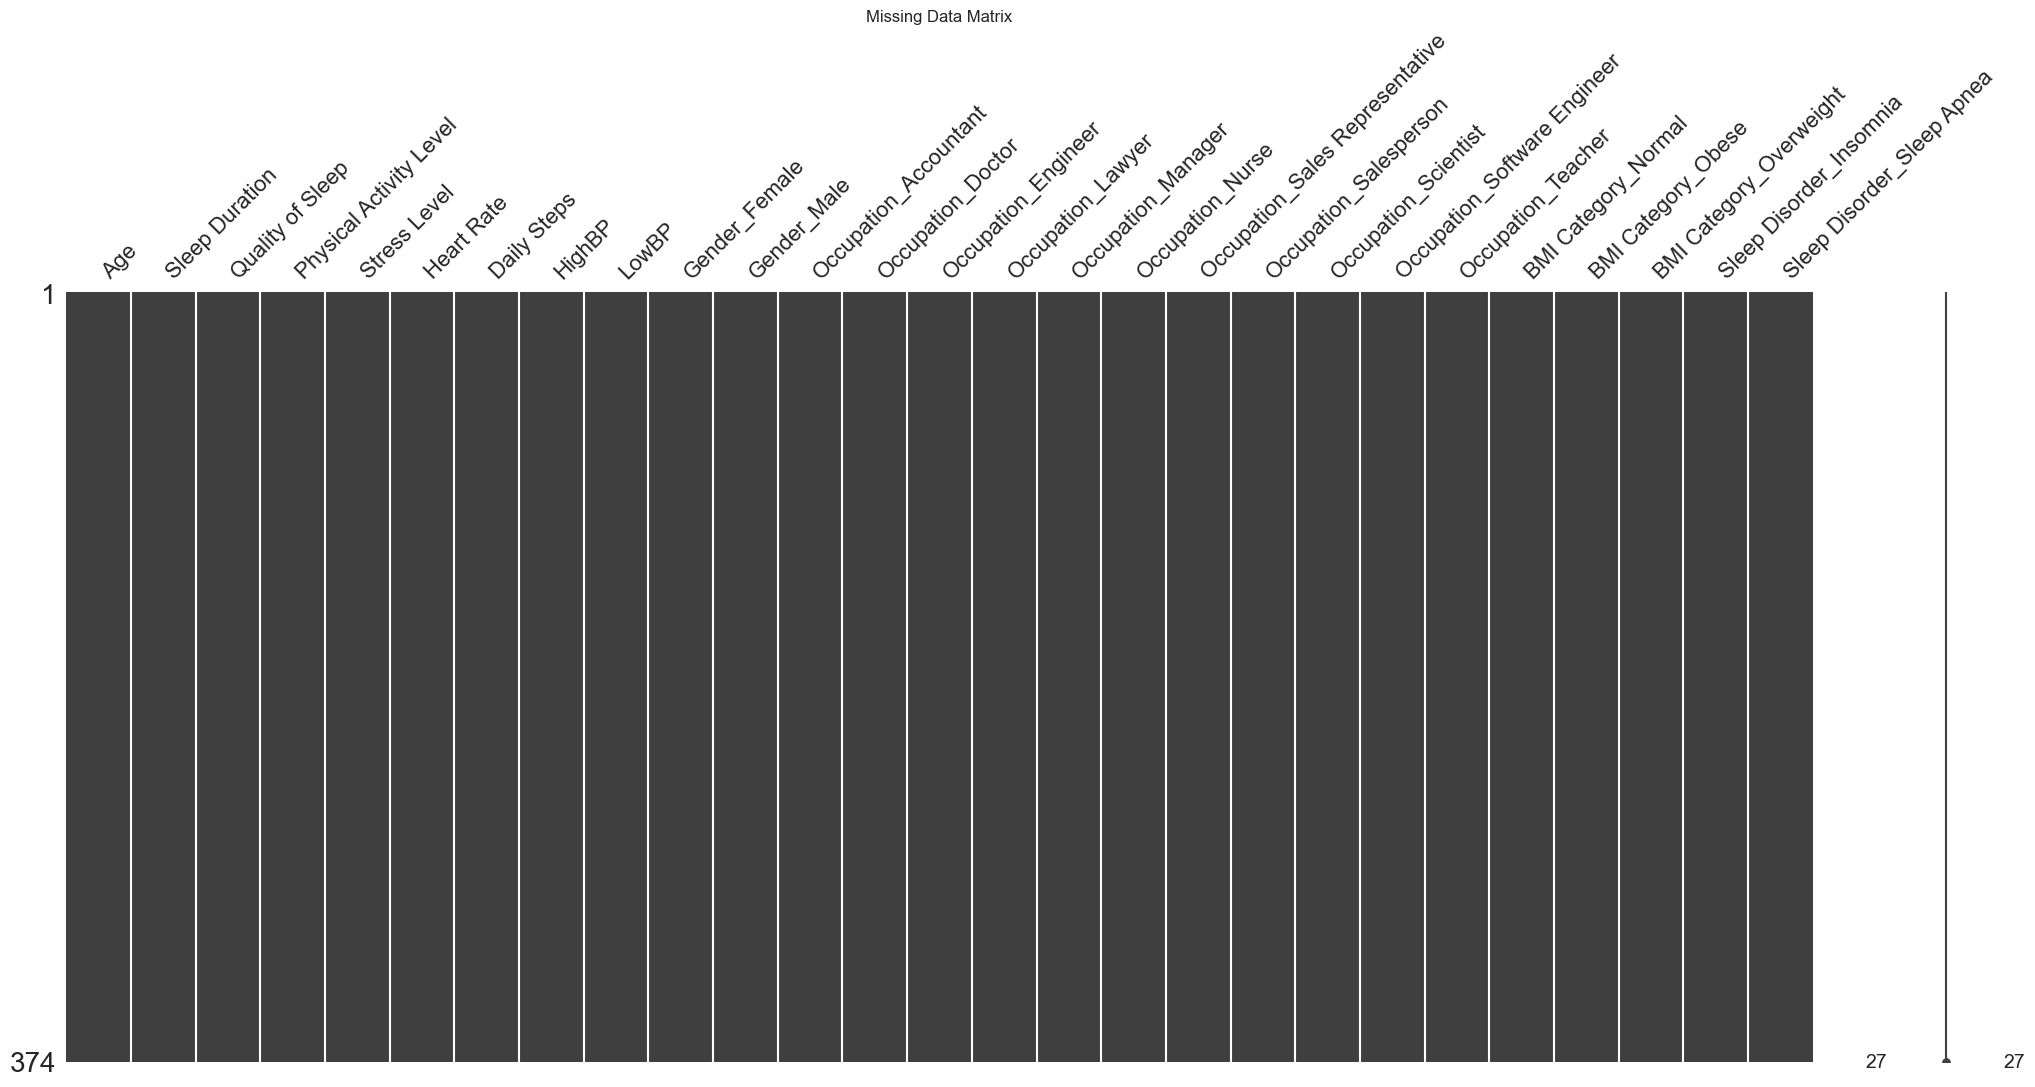

In [16]:
# =========================
# 2. Check for Missing Values
# =========================
print("\nMissing Values Count:")
print(X.isnull().sum())

# Visualize missing data
msno.matrix(X)
plt.title("Missing Data Matrix")
plt.show()



Exploring Numerical Features:


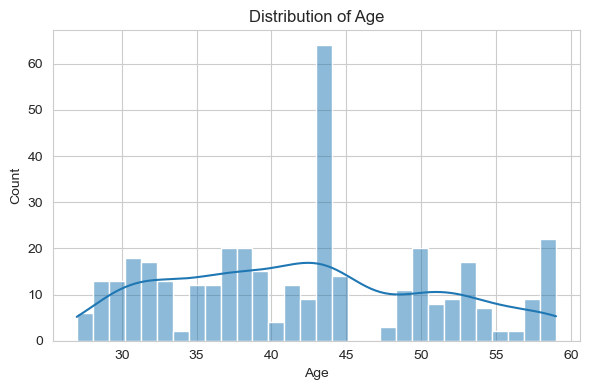

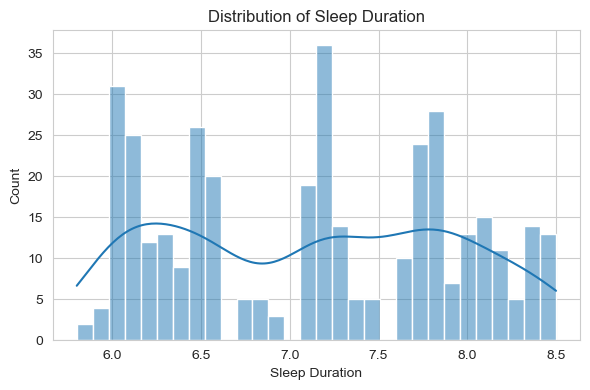

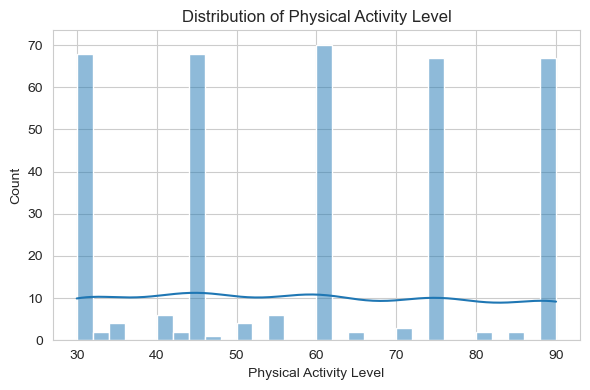

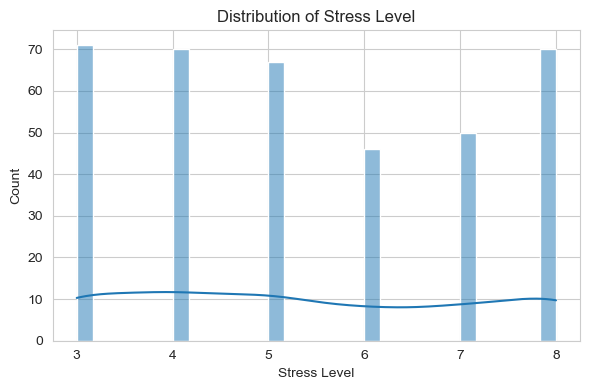

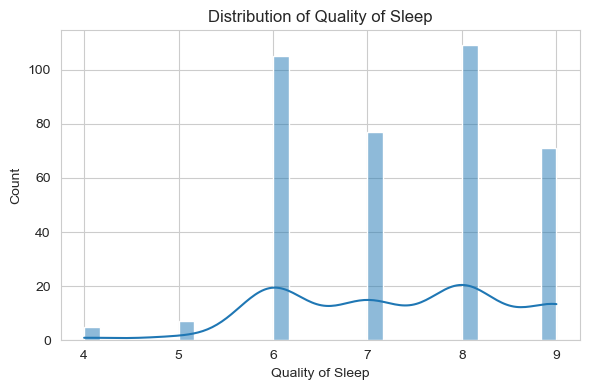

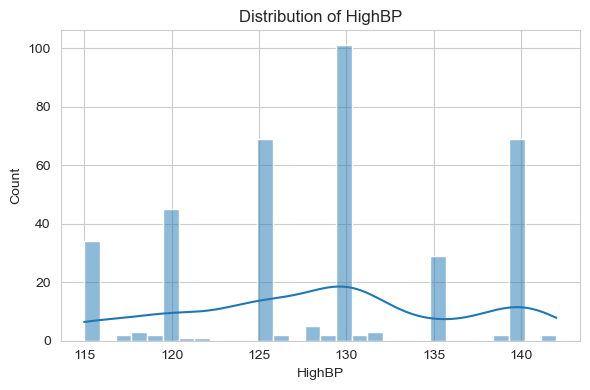

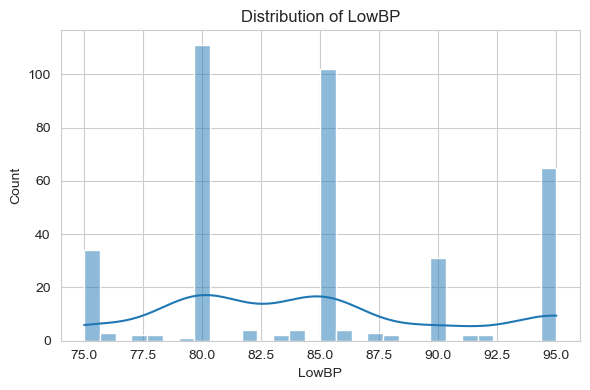

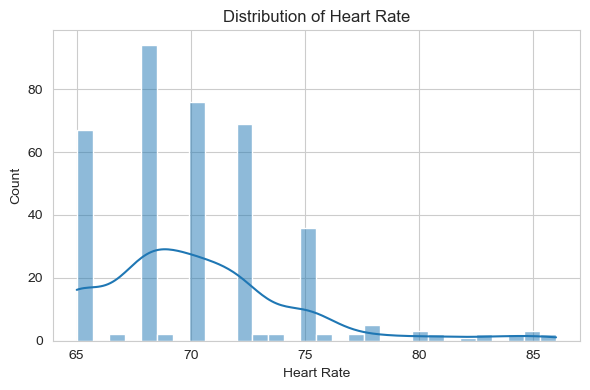

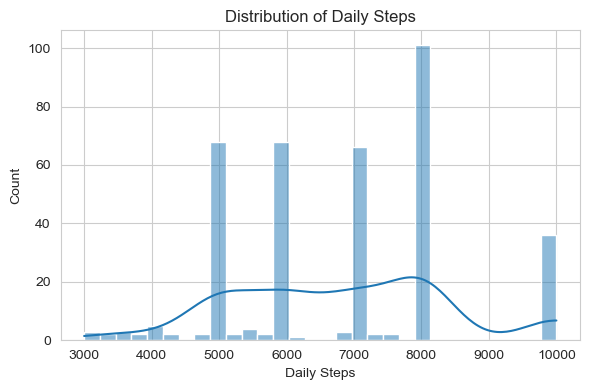

In [17]:
# =========================
# 3. Explore Feature Distributions
# =========================
# Numerical columns
numerical_cols = [
    'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
    'Quality of Sleep', 'HighBP', 'LowBP', 'Heart Rate', 'Daily Steps'
]

print("\nExploring Numerical Features:")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    
    # Plot the histogram
    sns.histplot(data=X, x=col, kde=True, bins=30)
    
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()  # Avoid overlapping x-axis labels
    plt.show()


Sleep Duration                     0.883213
Age                                0.473734
Occupation_Engineer                0.414126
BMI Category_Normal                0.318928
Gender_Female                      0.291366
Physical Activity Level            0.192896
Occupation_Lawyer                  0.184201
Occupation_Accountant              0.160513
Occupation_Nurse                   0.023495
Daily Steps                        0.016791
Occupation_Manager                -0.013551
Sleep Disorder_Sleep Apnea        -0.046254
Occupation_Software Engineer      -0.070702
Occupation_Teacher                -0.097806
LowBP                             -0.110151
HighBP                            -0.121632
BMI Category_Obese                -0.126574
Occupation_Scientist              -0.201176
Occupation_Sales Representative   -0.203211
Occupation_Doctor                 -0.269276
BMI Category_Overweight           -0.280398
Gender_Male                       -0.291366
Sleep Disorder_Insomnia         

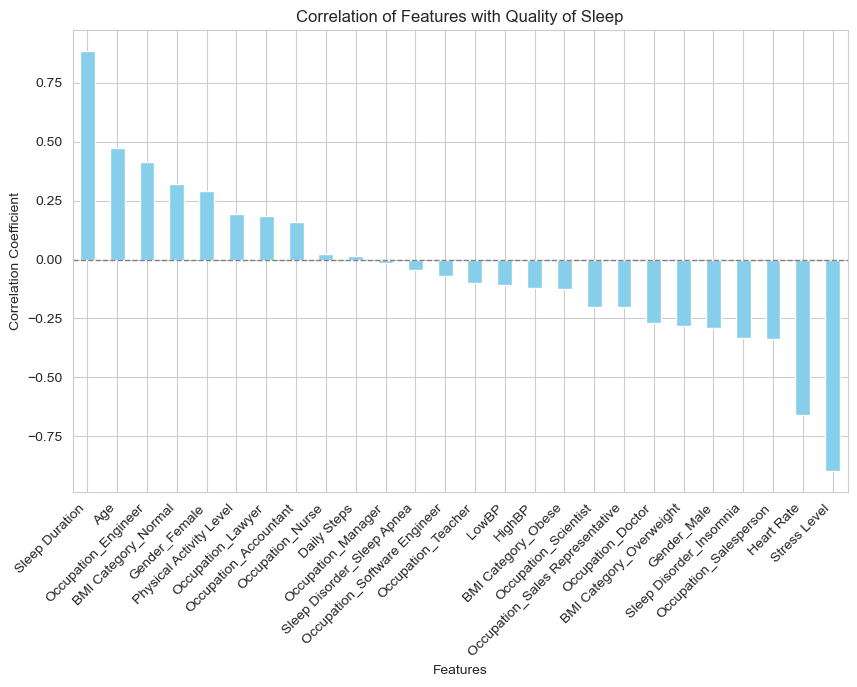

In [22]:
# =========================
# 4. Correlation and Relationships Analysis
# =========================
# Compute the correlation matrix
correlation_matrix = X.corr()

# Extract correlations with the target variable
target_correlation = correlation_matrix['Quality of Sleep'].drop('Quality of Sleep')

# Display sorted correlation values
print(target_correlation.sort_values(ascending=False))

# Plot the correlation values
plt.figure(figsize=(10, 6))
target_correlation.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f"Correlation of Features with {'Quality of Sleep'}")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(rotation=45, ha="right")
plt.show()



Detecting Outliers:


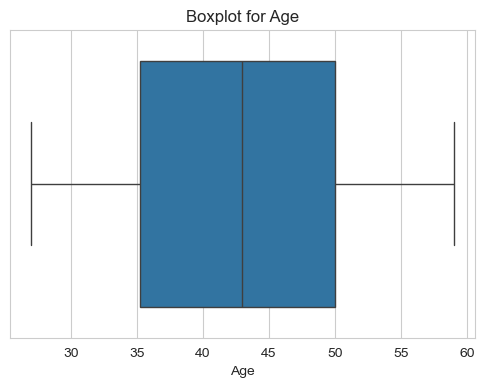

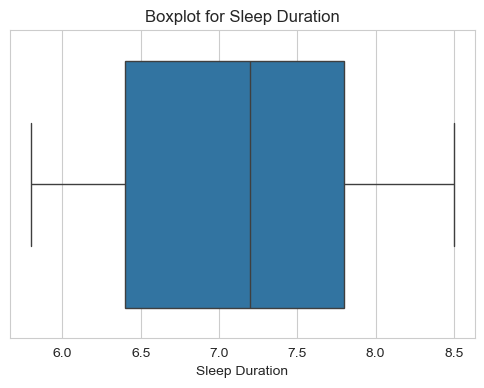

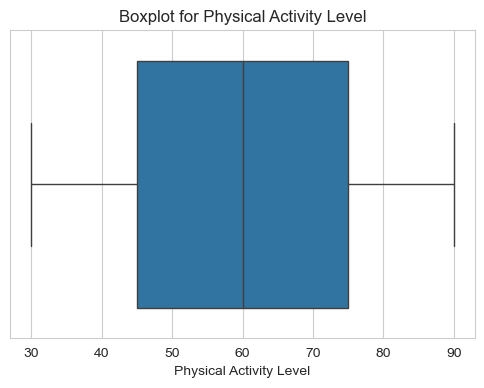

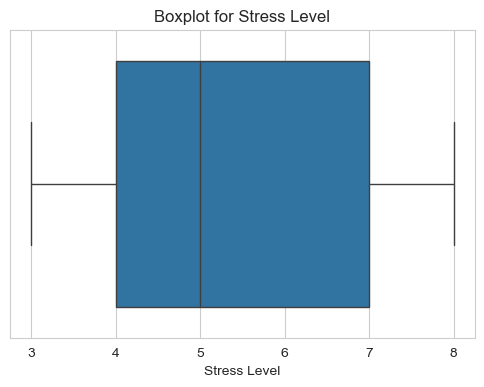

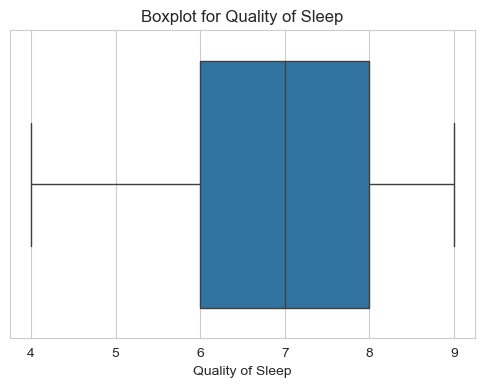

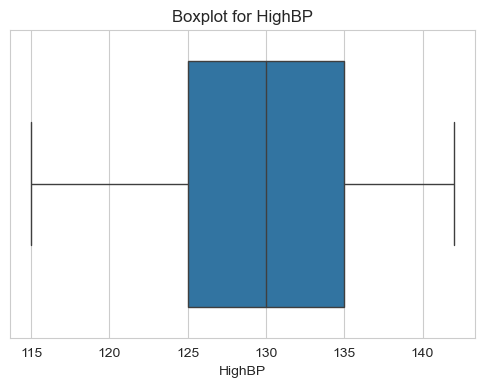

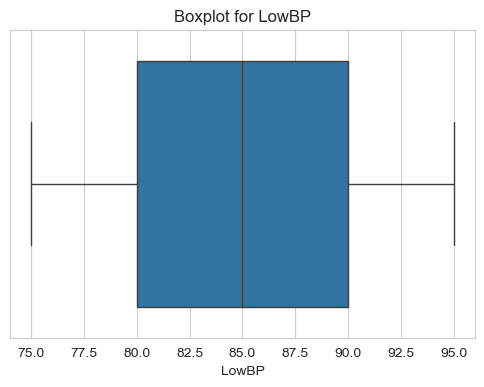

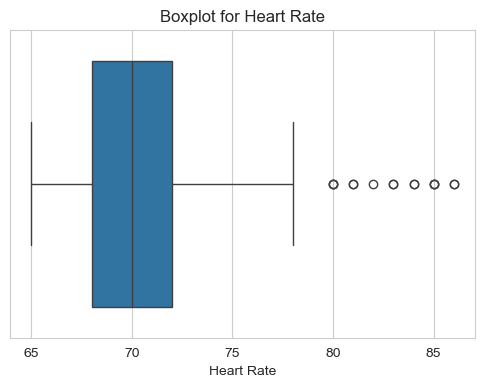

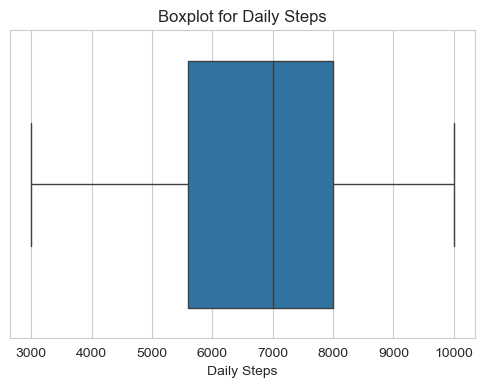

In [24]:
# =========================
# 5. Outlier Detection
# =========================
print("\nDetecting Outliers:")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=X, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()